In [1]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)
#np.random.seed(99)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    
def myregression(x, y, method=None): 
    if method == None or method == 'O':
        rm = sm.OLS(y, x)
    elif method == 'W':
        rm = sm.WLS(y, x)
    else:
        print ("Problem in the way you called myregression")
        return -1
            
    reg = rm.fit()
    print ("linear regression slope {}".format(reg.summary()))
    return reg

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

<Container object of 3 artists>

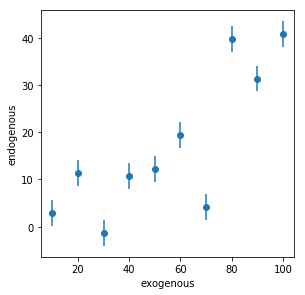

In [3]:
x = np.linspace(10,100,10)
y = line(0.3, x, 0, errors) 

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.scatter(x, y)
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')
ax.errorbar(x, y, yerr=e, fmt='.')

# 2. Print y, x

In [4]:
print(x)

[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


In [5]:
print(y)

[  2.89336057  11.4128238   -1.31247884  10.7061523   12.18193532
  19.39752705   4.20364414  39.82899567  31.4076147   40.90004801]


In [6]:
print(sm.add_constant(x))

[[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


# 3. use statsmodels.api.OLS to fit x and y

In [7]:
smfitWrong = smf.OLS(y, x).fit()
smfitWrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     49.45
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           6.10e-05
Time:                        20:17:22   Log-Likelihood:                -35.950
No. Observations:                  10   AIC:                             73.90
Df Residuals:                       9   BIC:                             74.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3329      0.047      7.032      0.000         0.226     0.440
==============================================================================
Omnibus:                        1.089   Durbin-Watson:                   2.500
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                0.357
Skew:                          -0.453   Prob(JB):                        0.837
Kurtosis:                       2.816   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
smfitRight = smf.OLS(y, sm.add_constant(x)).fit()
smfitRight.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     15.47
Date:                Tue, 13 Nov 2018   Prob (F-statistic):            0.00434
Time:                        20:17:22   Log-Likelihood:                -35.539
No. Observations:                  10   AIC:                             75.08
Df Residuals:                       8   BIC:                             75.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -5.3527      6.459     -0.829      0.431       -20.246     9.541
x1             0.4094      0.104      3.933      0.004         0.169     0.649
==============================================================================
Omnibus:                        3.254   Durbin-Watson:                   2.704
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                1.074
Skew:                          -0.790   Prob(JB):                        0.584
Kurtosis:                       3.288   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As seen in the two results above, when I forced the regression to have a constant, I got a lower r-square, which makes sense because the data initially did not have a constant at all (the constant was set to zero). If i force it to pass through an x intercept, the "best fit" will have to be adjusted, which would increase the residuals, and hence give a lower r square.

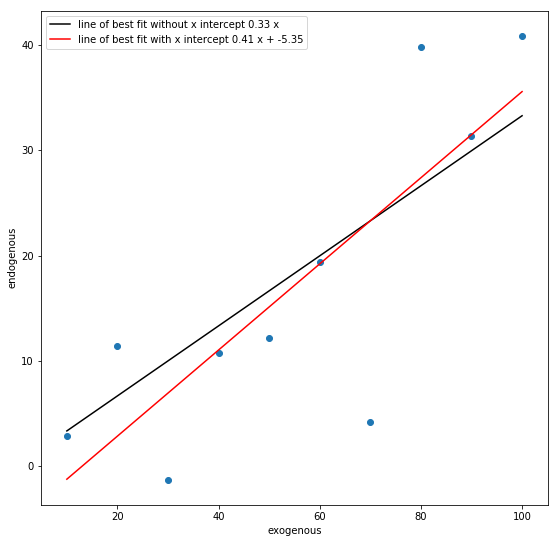

In [9]:
beta0_right, beta1_right = smfitRight.params
beta1_wrong = smfitWrong.params

fig = pl.figure(figsize=(20,20))
ax = fig.add_subplot(221)
pl.plot(x, beta1_wrong*x,'k-', label = "line of best fit without x intercept %.2f x"\
       %(beta1_wrong))
pl.plot(x, beta1_right*x + beta0_right,'r-', label = "line of best fit with x intercept %.2f x + %.2f"\
       %(beta1_right, beta0_right))
ax.scatter(x, y)
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')
ax.legend()

Figure 1: I've plotted the data with two lines of best fit. The red line is showing the line of best fit with an x intercept and the black line shows\ the line of best fit with the x intercept set at 0

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

<Container object of 3 artists>

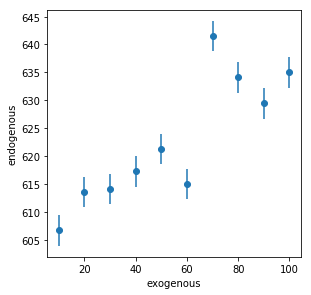

In [10]:
x = np.linspace(10,100,10)
y = line(0.5, x, 600, errors)

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.scatter(x, y)
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')
ax.errorbar(x, y, yerr=e, fmt='.')

# 6. repeat step 3

In [11]:
smfitWrong = smf.OLS(y, x).fit()
smfitWrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     35.50
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           0.000213
Time:                        20:17:22   Log-Likelihood:                -70.542
No. Observations:                  10   AIC:                             143.1
Df Residuals:                       9   BIC:                             143.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             8.9659      1.505      5.958      0.000         5.562    12.370
==============================================================================
Omnibus:                        0.911   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.608
Skew:                          -0.010   Prob(JB):                        0.738
Kurtosis:                       1.792   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
smfitRight = smf.OLS(y, sm.add_constant(x)).fit()
smfitRight.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     21.03
Date:                Tue, 13 Nov 2018   Prob (F-statistic):            0.00179
Time:                        20:17:22   Log-Likelihood:                -31.627
No. Observations:                  10   AIC:                             67.25
Df Residuals:                       8   BIC:                             67.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        605.0161      4.368    138.523      0.000       594.944   615.088
x1             0.3228      0.070      4.586      0.002         0.161     0.485
==============================================================================
Omnibus:                        6.440   Durbin-Watson:                   2.558
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                2.161
Skew:                           0.944   Prob(JB):                        0.339
Kurtosis:                       4.275   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

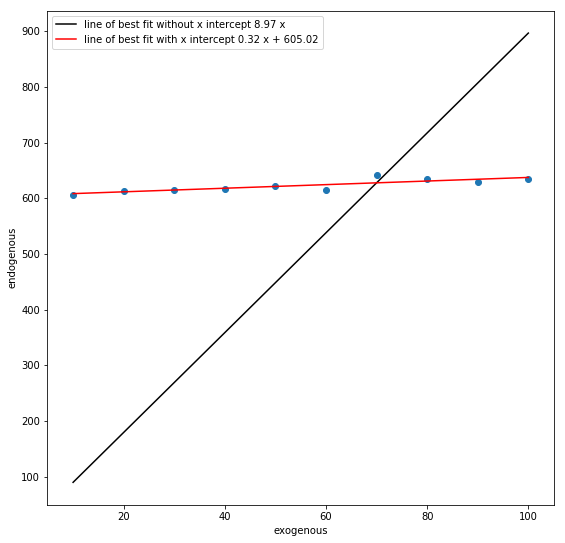

In [13]:
beta0_right, beta1_right = smfitRight.params
beta1_wrong = smfitWrong.params

fig = pl.figure(figsize=(20,20))
ax = fig.add_subplot(221)
pl.plot(x, beta1_wrong*x,'k-', label = "line of best fit without x intercept %.2f x"\
       %(beta1_wrong))
pl.plot(x, beta1_right*x + beta0_right,'r-', label = "line of best fit with x intercept %.2f x + %.2f"\
       %(beta1_right, beta0_right))
ax.scatter(x, y)
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')
ax.legend()

Here we see a significant difference in the models results if we try to add a constant and if we do not add a constant. The x coefficient for the 'right' model with a constant is very similar to the coefficient set at the beginning of step 5, whereas the coefficient for the 'wrong' model with an x intercept of zero is approximately 9, which is significantly higher than what the coefficient was set to be - this is because we are trying to force the line to go through (0,0).

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

In [14]:
rm = myregression(sm.add_constant(x), y, method='W')

linear regression slope                             WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.724
Model:                            WLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     21.03
Date:                Tue, 13 Nov 2018   Prob (F-statistic):            0.00179
Time:                        20:17:23   Log-Likelihood:                -31.627
No. Observations:                  10   AIC:                             67.25
Df Residuals:                       8   BIC:                             67.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        605.0161      4

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [15]:
rm.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.724
Model:                            WLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     21.03
Date:                Tue, 13 Nov 2018   Prob (F-statistic):            0.00179
Time:                        20:17:23   Log-Likelihood:                -31.627
No. Observations:                  10   AIC:                             67.25
Df Residuals:                       8   BIC:                             67.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        605.0161      4.368    138.523      0.000       594.944   615.088
x1             0.3228      0.070      4.586      0.002         0.161     0.485
==============================================================================
Omnibus:                        6.440   Durbin-Watson:                   2.558
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                2.161
Skew:                           0.944   Prob(JB):                        0.339
Kurtosis:                       4.275   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

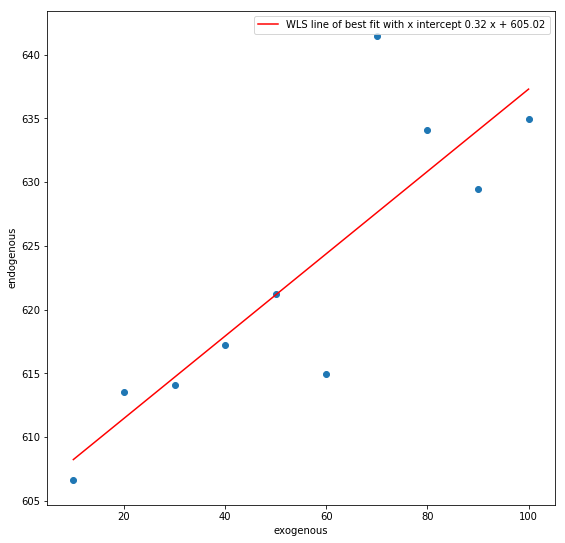

In [16]:
beta0, beta1 = rm.params
#beta1_wrong = smfitWrong.params
fig = pl.figure(figsize=(20,20))
ax = fig.add_subplot(221)

pl.plot(x, beta1*x + beta0,'r-', label = "WLS line of best fit with x intercept %.2f x + %.2f"\
       %(beta1, beta0))
ax.scatter(x, y)
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')
ax.legend()

Figure 2: Plot showing the line of best fit as per the WLS method